In [1]:
import eigensheep

In [3]:
%%eigensheep --layer arn:aws:lambda:us-east-1:972882471061:layer:puppeteer:1 pyppeteer

import os
os.environ['PYPPETEER_HOME'] = '/tmp/home'
import pyppeteer
import asyncio

async def main():
    browser = await pyppeteer.launch({
        'executablePath': '/opt/headless_shell',
        'headless': True,
        'args': ['--no-sandbox', '--disable-gpu', '--single-process']
    })
    page = await browser.newPage()
    await page.goto('http://example.com')
    await page.screenshot({'path': '/tmp/example.png'})
    await browser.close()

asyncio.get_event_loop().run_until_complete(main())

SAVE('screenshot.png', open('/tmp/example.png', 'rb').read())


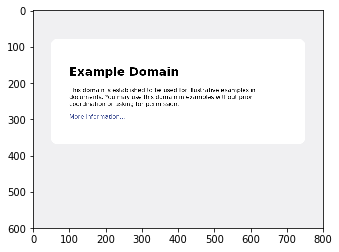

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

with open('screenshot.png', 'wb') as f:
    f.write(LOAD('screenshot.png'))
    
plt.imshow(plt.imread('screenshot.png'))